In [4]:
import pickle
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [7]:
# Load the IMDb movie review dataset
data = pd.read_csv('imdb_reviews.csv')

# Preprocessing the data
data['review'] = data['review'].apply(lambda x: re.sub('<.*?>', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
data['review'] = data['review'].apply(lambda x: x.lower())
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
lemmatizer = WordNetLemmatizer()
data['review'] = data['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Convert the text into a numerical format
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['review'])
y = data['sentiment']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
scores = cross_val_score(model, X, y, cv=5)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
# Predict probabilities for the test set
probabilities = model.predict_proba(X_test)
y=probabilities
probabilities=np.around(probabilities, decimals=3)
print(probabilities[:15])

[[0.996 0.004]
 [0.    1.   ]
 [0.99  0.01 ]
 [0.001 0.999]
 [1.    0.   ]
 [0.    1.   ]
 [0.012 0.988]
 [0.408 0.592]
 [0.566 0.434]
 [1.    0.   ]
 [0.997 0.003]
 [0.002 0.998]
 [1.    0.   ]
 [0.996 0.004]
 [1.    0.   ]]


In [11]:
y_pred=model.predict(X_test)
y_pred,y_test,probabilities

(array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
        'positive'], dtype=object),
 33553    positive
 9427     positive
 199      negative
 12447    positive
 39489    negative
            ...   
 28567    negative
 25079    positive
 18707    positive
 15200    negative
 5857     positive
 Name: sentiment, Length: 10000, dtype: object,
 array([[0.996, 0.004],
        [0.   , 1.   ],
        [0.99 , 0.01 ],
        ...,
        [0.001, 0.999],
        [0.793, 0.207],
        [0.203, 0.797]]))

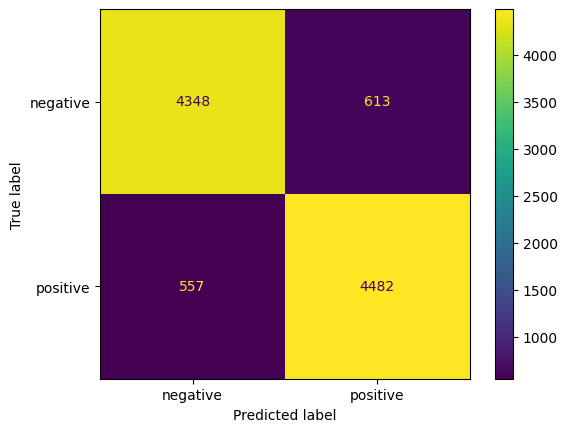

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


In [64]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4961
    positive       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



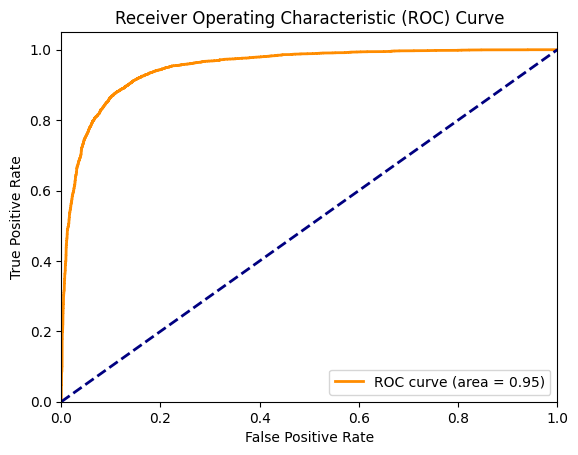

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability estimates for the positive class (class 1, i.e., 'positive')
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='positive')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [18]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_proba)
print(f"Log Loss: {logloss:.2f}")


Log Loss: 0.35


In [19]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_proba)
print(f"Log Loss: {logloss:.2f}")



Log Loss: 0.35


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your data is already preprocessed and vectorized
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 16 units
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test).flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary outcomes

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Model Accuracy: {accuracy * 100:.2f}%")


In [5]:
# # Save the model and vectorizer using pickle
# pickle.dump(model, open('model.pkl', 'wb'))
# pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# Load the model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

In [41]:


# Load the model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Custom input
custom_review = "delightful movie with a charming cast"

# Preprocessing the custom input
# Remove HTML tags (if any)
custom_review = re.sub('<.*?>', '', custom_review)

# Remove non-alphabetic characters
custom_review = re.sub('[^a-zA-Z]', ' ', custom_review)

# Convert text to lowercase
custom_review = custom_review.lower()

# Remove stop words
stop_words = set(stopwords.words('english'))
custom_review = ' '.join([word for word in custom_review.split() if word not in stop_words])

# Lemmatize the text
lemmatizer = WordNetLemmatizer()
custom_review = ' '.join([lemmatizer.lemmatize(word) for word in custom_review.split()])

# Convert the custom input into a numerical format using the vectorizer
custom_review_vectorized = vectorizer.transform([custom_review])

# Predict the probability for the positive class
probability = model.predict_proba(custom_review_vectorized)[0][1]

# Round the probability to 10 decimal places
probability = round(probability, 10)

print(f"Probability of the custom review being positive: {probability}")


Probability of the custom review being positive: 0.7400305447


In [19]:
# Custom input
custom_review = "delightful goooood ice verrrrry movie with0....>?<< a charming cast"

In [20]:
custom_review = re.sub('<.*?>', '', custom_review)

In [22]:
custom_review = re.sub('[^a-zA-Z]', ' ', custom_review)

In [24]:
# Remove stop words
stop_words = set(stopwords.words('english'))
custom_review = ' '.join([word for word in custom_review.split() if word not in stop_words])


In [28]:
lemmatizer = WordNetLemmatizer()
custom_review = ' '.join([lemmatizer.lemmatize(word) for word in custom_review.split()])

In [29]:
custom_review

'delightful goooood ice verrrrry movie charming cast'